In [4]:
from matplotlib import pyplot as plt
import numpy as np
# from deepcell.datasets import TissueNetSample
from deepcell.utils.plot_utils import create_rgb_image, make_outline_overlay
from PIL import Image
from skimage.io import imread, imshow, imsave

In [ ]:
# Download multiplex data
# X, y, _ = TissueNetSample().load_data()

# nuclear_img = Image.open('./20221220_S17_7722_E4_Scan1_nuclear.jpg')
# membrane_img = Image.open('./20221220_S17_7722_E4_Scan1_membrane.jpg')
# X_nuclear = np.asarray(nuclear_img)
# X_membrane = np.asarray(membrane_img)

image = imread('20221220_S17_7722_E4_Scan1.tif')

X = np.random.rand(1, np.shape(image)[1], np.shape(image)[2], 2)
X[0, ..., 0] = image[0,:,:]
X[0, ..., 1] = image[0,:,:]
# X[0, ..., 1] = image[11,:,:]+image[10,:,:]+image[26,:,:] #  CD31 + E cadherin + CD45
# X[0, ..., 1] = image[8,:,:]+image[10,:,:]+image[64,:,:] # Vimentin + E Cadherin + Pan Cytokeratin
# X[0, ..., 1] = image[10,:,:]+image[63,:,:] # E cadherin + Ki67

rgb_images = create_rgb_image(X, channel_colors=['green', 'blue'])
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(X[0, ..., 0], cmap='Greys_r')
ax[1].imshow(X[0, ..., 1], cmap='Greys_r')
ax[2].imshow(rgb_images[0, ...])

ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
ax[2].set_title('Overlay')

for a in ax:
    a.axis('off')

plt.show()
fig.savefig('mesmer-input.png')

In [ ]:
# token: SibhZsQN.KZdnQdigkeQZtnSJVJlxoIrKiKEdj33W
import os
os.environ.update({"DEEPCELL_ACCESS_TOKEN": "SibhZsQN.KZdnQdigkeQZtnSJVJlxoIrKiKEdj33W"})
from deepcell.applications import Mesmer
app = Mesmer()

print('Training Resolution:', app.model_mpp, 'microns per pixel')

# segmentation_predictions = app.predict(X, image_mpp=0.5)
# overlay_data = make_outline_overlay(rgb_data=rgb_images, predictions=segmentation_predictions)
idx = 0

labeled_image = np.zeros_like(X)
step_size = 4000

for row in range(0, labeled_image.shape[0], step_size):
      for col in range(0, labeled_image.shape[1], step_size):
           labeled_image[row:(row + step_size), col:(col + step_size)] = app.predict(X[row:(row + step_size), col:(col + step_size)])

overlay_data = make_outline_overlay(rgb_data=rgb_images, predictions=labeled_image)

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rgb_images[idx, ...])
ax[1].imshow(overlay_data[idx, ...])

ax[0].set_title('Raw data')
ax[1].set_title('Predictions')

for a in ax:
    a.axis('off')

plt.show()
fig.savefig('mesmer-wc.png')

In [ ]:
idx = 0
segmentation_predictions_expansion = np.zeros_like(X)
step_size = 10000
for row in range(0, segmentation_predictions_expansion.shape[0], step_size):
      for col in range(0, segmentation_predictions_expansion.shape[1], step_size):
        segmentation_predictions_expansion[row:(row + step_size), col:(col + step_size)] = app.predict(
            X[row:(row + step_size), col:(col + step_size)],
            image_mpp=0.5,
            compartment='nuclear',
            postprocess_kwargs_nuclear={'pixel_expansion': 5}
        )

overlay_data_expansion = make_outline_overlay(
    rgb_data=rgb_images,
    predictions=segmentation_predictions_expansion
)

In [ ]:
idx = 0
print(np.shape(overlay_data_expansion))
plt.figure(figsize=(20,20))
plt.imshow(overlay_data_expansion[idx, ..., 2])
# plt.imshow(segmentation_predictions_expansion[idx, ..., 0])
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
imsave('deepcellmask.tiff', overlay_data_expansion[0, ..., 0])
pd.DataFrame(overlay_data_expansion[0, ..., 0]).to_csv('deepcellmask.csv', index=False, header=False)
pd.DataFrame(segmentation_predictions_expansion[0,...,0]).to_csv('segmentation_predictions_expansion0.csv', index=False, header=False)
pd.DataFrame(segmentation_predictions_expansion[0,...,1]).to_csv('segmentation_predictions_expansion1.csv', index=False, header=False)

In [ ]:
import pandas as pd
temp0 = pd.read_csv('segmentation_predictions_expansion0.csv', index_col=False, header=None)
temp1 = pd.read_csv('segmentation_predictions_expansion1.csv', index_col=False, header=None)
output = np.random.rand(1, np.shape(temp0)[0], np.shape(temp0)[1], 2)
output[0,...,0] = temp0
output[0,...,1] = temp1

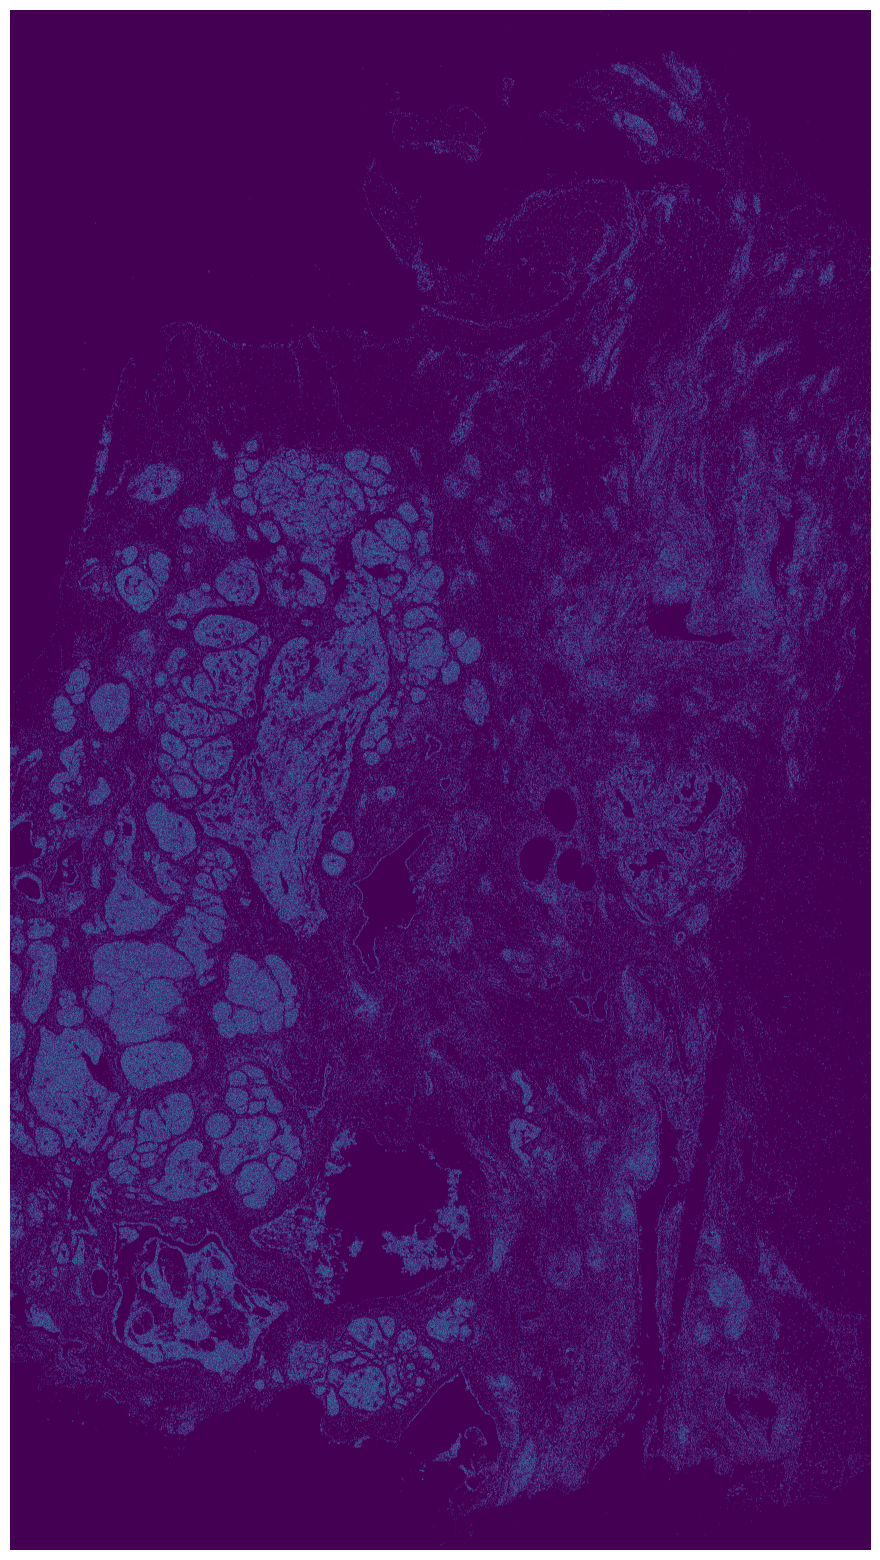

In [3]:
import pandas as pd
mask = pd.read_csv('deepcellmask.csv', index_col=False, header=None)
plt.figure(figsize=(10,10))
plt.imshow(mask)
plt.axis('off')
plt.show()


In [6]:
imsave('deepcellmask.tiff', mask.to_numpy())

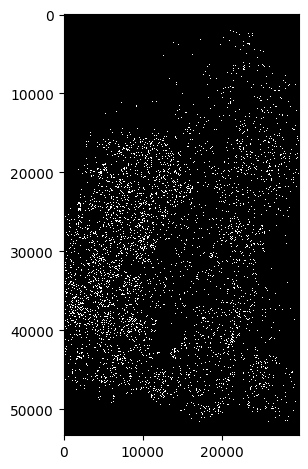

In [7]:
image = imread('deepcellmask.tiff')
imshow(image)